In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("smartcart_customers.csv")

In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

# DATA PREPROCESSING

### 1. HANDLE MISSING VALUE

In [8]:
df["Income"] = df["Income"].fillna(df["Income"].median())

###  feature Engineering

In [9]:
#Age
df["Age"] = 2026 - df["Year_Birth"]

In [10]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst = True)

reference_data = df["Dt_Customer"].max()

df["Customer_Tenure_Days"] = (reference_data - df["Dt_Customer"]).dt.days

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    2240 non-null   int64         
 1   Year_Birth            2240 non-null   int64         
 2   Education             2240 non-null   object        
 3   Marital_Status        2240 non-null   object        
 4   Income                2240 non-null   float64       
 5   Kidhome               2240 non-null   int64         
 6   Teenhome              2240 non-null   int64         
 7   Dt_Customer           2240 non-null   datetime64[ns]
 8   Recency               2240 non-null   int64         
 9   MntWines              2240 non-null   int64         
 10  MntFruits             2240 non-null   int64         
 11  MntMeatProducts       2240 non-null   int64         
 12  MntFishProducts       2240 non-null   int64         
 13  MntSweetProducts  

In [12]:
# Spending 

df["Total_spending"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

In [13]:
#children

df["Total_Children"] = df["Kidhome"] + df["Teenhome"]

In [14]:
#Education

df["Education"] = df["Education"].replace({
    "Basic" : "Undergraduate", "2n Cycle" : "Undergraduate",
    "Graduation" : "Graduation",
    "Master" : "PostGraduate","PhD" : "PostGraduate"
})

In [15]:
#marital status

df["Living_with"] = df["Marital_Status"].replace({
    "Married" : "Partner", "Together" : "Partner",
    "Single" : "Alone",
    "Divorced" : "Alone","Widow" : "Alone",
    "YOLO" : "Alone", "Absurd" : "Alone"
})

In [16]:
df["Living_with"].value_counts()

Living_with
Partner    1444
Alone       796
Name: count, dtype: int64

# Drop Columns

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    2240 non-null   int64         
 1   Year_Birth            2240 non-null   int64         
 2   Education             2240 non-null   object        
 3   Marital_Status        2240 non-null   object        
 4   Income                2240 non-null   float64       
 5   Kidhome               2240 non-null   int64         
 6   Teenhome              2240 non-null   int64         
 7   Dt_Customer           2240 non-null   datetime64[ns]
 8   Recency               2240 non-null   int64         
 9   MntWines              2240 non-null   int64         
 10  MntFruits             2240 non-null   int64         
 11  MntMeatProducts       2240 non-null   int64         
 12  MntFishProducts       2240 non-null   int64         
 13  MntSweetProducts  

In [18]:
cols = ["ID","Kidhome","Teenhome","Marital_Status","Dt_Customer","Year_Birth"]
spending_cols = ["MntWines","MntFruits","MntFishProducts","MntSweetProducts","MntGoldProds","MntMeatProducts"]

cols_to_drop = cols + spending_cols

df_cleaned = df.drop(columns = cols_to_drop)

In [19]:
df_cleaned.shape

(2240, 15)

In [20]:
df_cleaned.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_spending,Total_Children,Living_with
0,Graduation,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,Alone
1,Graduation,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,Alone
2,Graduation,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,Partner
3,Graduation,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,Partner
4,PostGraduate,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,Partner


# Outliers

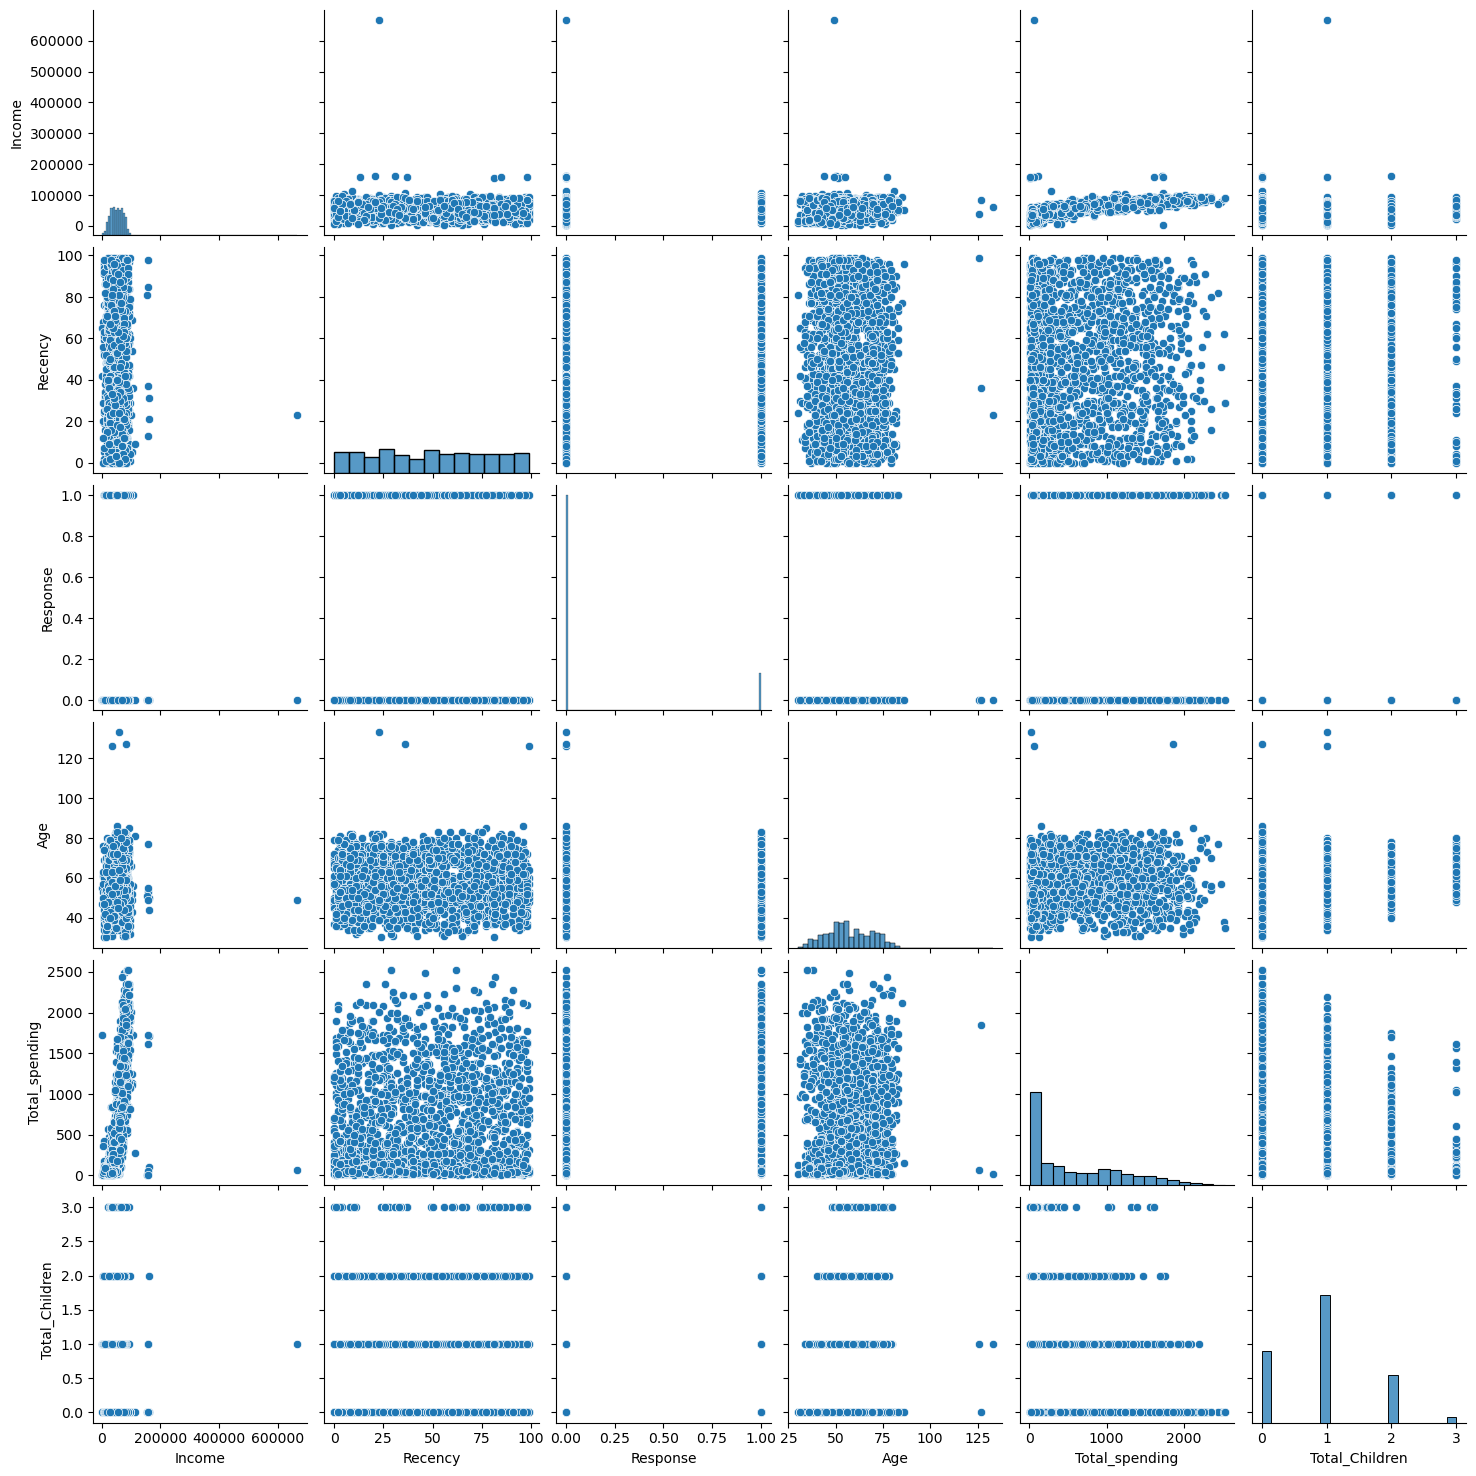

In [21]:
cols = ["Income","Recency","Response","Age","Total_spending","Total_Children"]

#relative plots of some features - pair plot
sns.pairplot(df_cleaned[cols])

# Remove Outlier

In [22]:
# Remove Outlier

print("data size with outlier", len(df_cleaned))

df_cleaned = df_cleaned[ (df_cleaned["Age"] < 90) ]
df_cleaned = df_cleaned[ (df_cleaned["Income"] < 600_000) ]

print("data size without outlier", len(df_cleaned))

data size with outlier 2240
data size without outlier 2236


# Heatmap

In [23]:
corr = df_cleaned.corr(numeric_only = True)

<Axes: >

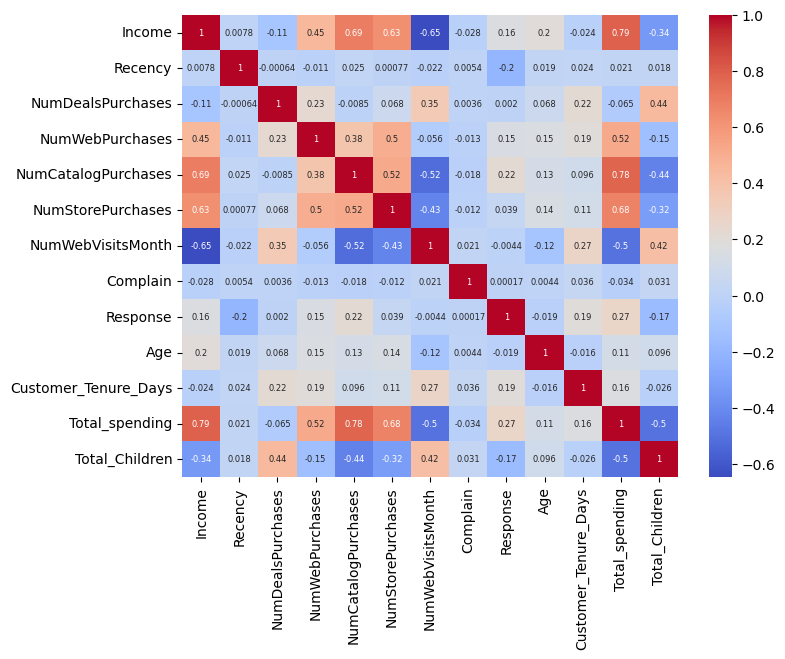

In [24]:
plt.figure(figsize = (8, 6))

sns.heatmap(
    corr,
    annot = True,
    annot_kws = {"size" : 6},
    cmap = "coolwarm"
)

# Encoding

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
ohe = OneHotEncoder()  #no drop first here

cat_cols = ["Education", "Living_with"]

enc_cols = ohe.fit_transform(df_cleaned[cat_cols])

In [27]:
enc_df = pd.DataFrame(enc_cols.toarray(), columns = ohe.get_feature_names_out(cat_cols), index = df_cleaned.index)


In [28]:
df_encoded = pd.concat([df_cleaned.drop(columns = cat_cols), enc_df], axis = 1)

In [29]:
df_encoded.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_spending,Total_Children,Education_Graduation,Education_PostGraduate,Education_Undergraduate,Living_with_Alone,Living_with_Partner
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0


# Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
X = df_encoded

In [32]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# visualise our data

In [33]:
#2D
from sklearn.decomposition import PCA

In [34]:
pca = PCA(n_components = 3)

X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(2236, 3)

Text(0.5, 0.92, '3d projection')

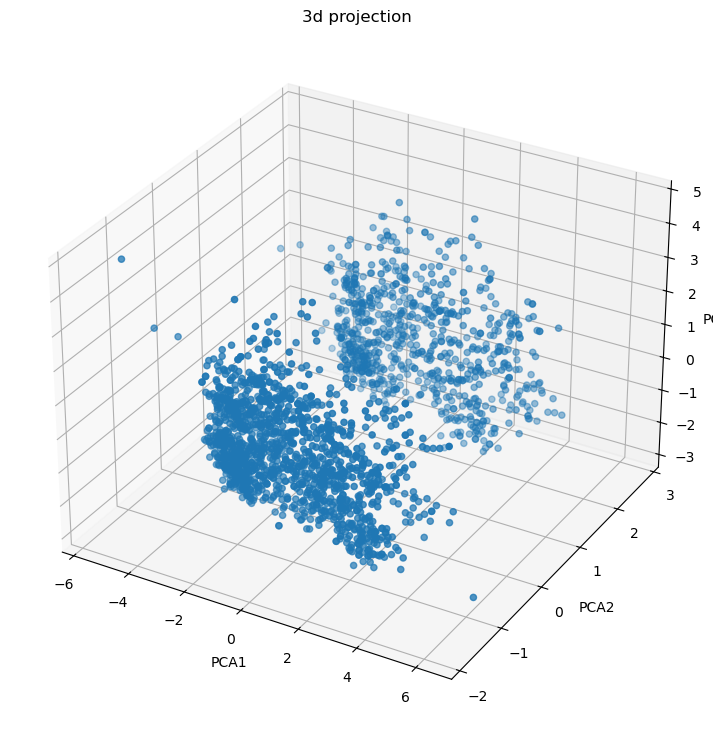

In [35]:
#plot 
fig = plt.figure(figsize = (11, 9))

ax = fig.add_subplot(111, projection = "3d")

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2])

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("3d projection")

In [36]:
pca.explained_variance_ratio_

array([0.23163158, 0.11385454, 0.10405815])

# Analyse K-value

### 1. Elbow Method

In [37]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

from sklearn.cluster import KMeans  
from kneed import KneeLocator

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit_predict(X_pca)
    wcss.append(kmeans.inertia_)

In [38]:
knee = KneeLocator(range(1, 11), wcss, curve = "convex", direction = "decreasing")

optimal_k = knee.elbow

In [39]:
print("best K =", optimal_k)

best K = 4


Text(0, 0.5, 'wcss')

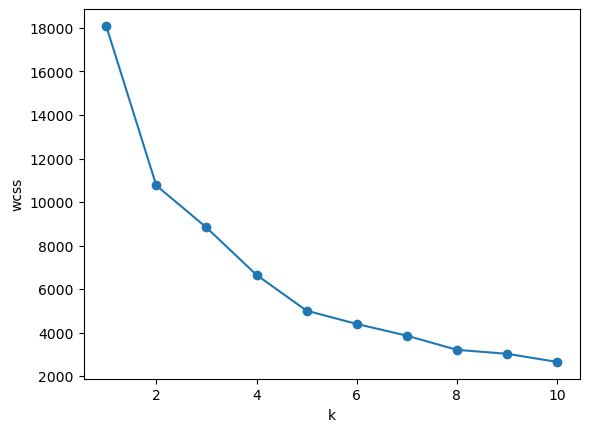

In [40]:
#plot 

plt.plot(range(1, 11), wcss, marker = "o")
plt.xlabel("k")
plt.ylabel("wcss")

Text(0, 0.5, 'scores')

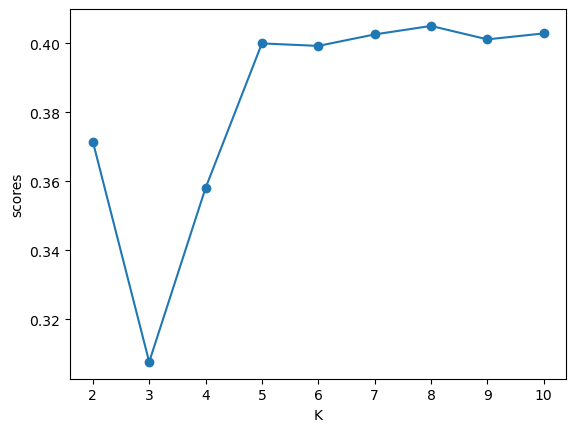

In [41]:
from sklearn.metrics import silhouette_score

scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    scores.append(score)


#plot
plt.plot(range(2, 11), scores, marker = "o")
plt.xlabel("K")
plt.ylabel("scores")

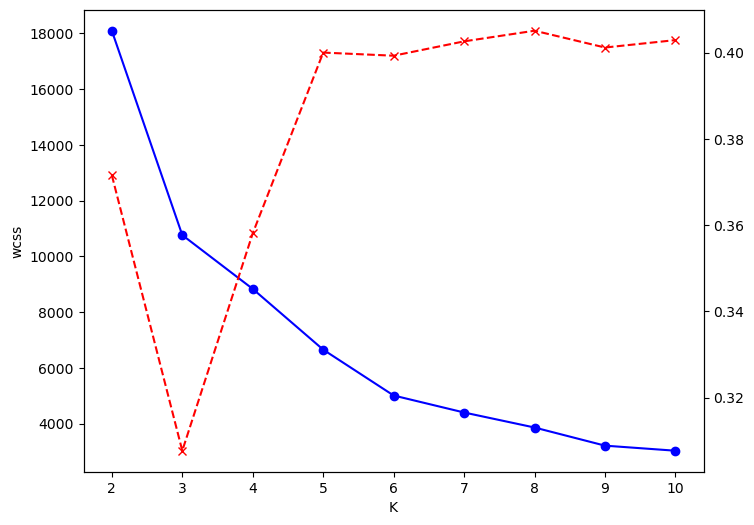

In [42]:
#combined plot
k_range = range(2, 11)

fig, ax1 = plt.subplots(figsize = (8, 6))

ax1.plot(k_range, wcss[:len(k_range)],marker = "o", color = "blue")
ax1.set_xlabel("K")
ax1.set_ylabel("wcss")

ax2 = ax1.twinx()
ax2.plot(k_range, scores[: len(k_range)], marker = "x", color = "red", linestyle = "--")

# clustering

In [ ]:
#kmeans

Kmeans = KMeans(n_clusters = 4,random_state = 42)

label_kmeans = kmeans.fit_predict(X_pca)

Text(0.5, 0.92, '3d projection')

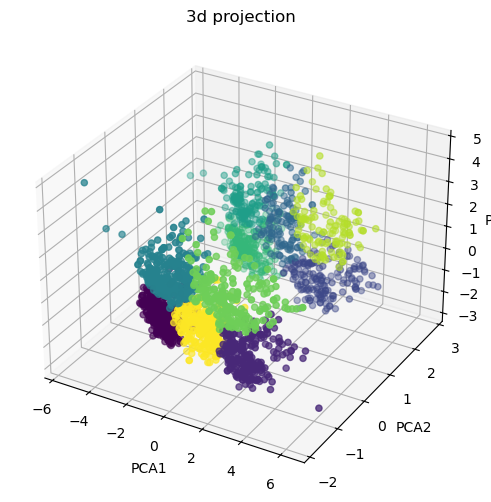

In [47]:
fig = plt.figure(figsize = (8, 6))

ax = fig.add_subplot(111, projection = "3d")

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c = label_kmeans)

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("3d projection")

In [49]:
# agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

In [50]:
agg_clf = AgglomerativeClustering(n_clusters = 4, linkage = "ward")
label_agg = agg_clf.fit_predict(X_pca)

Text(0.5, 0.92, '3d projection')

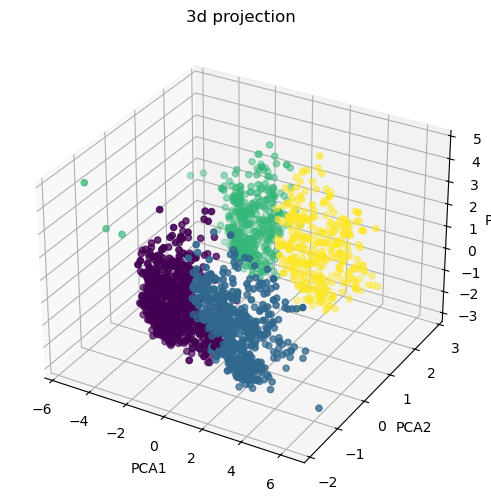

In [51]:
fig = plt.figure(figsize = (8, 6))

ax = fig.add_subplot(111, projection = "3d")

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c = label_agg)

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("3d projection")

# characterization of clusters

In [68]:
X["clusters"] = label_agg

In [70]:
X.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_spending,Total_Children,Education_Graduation,Education_PostGraduate,Education_Undergraduate,Living_with_Alone,Living_with_Partner,clusters
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,0.0,1.0,0.0,3
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,0.0,1.0,0.0,2
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,1.0,0.0,0.0,0.0,1.0,1
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,1.0,0.0,0.0,0.0,1.0,0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,0.0,1.0,0


<Axes: xlabel='clusters', ylabel='count'>

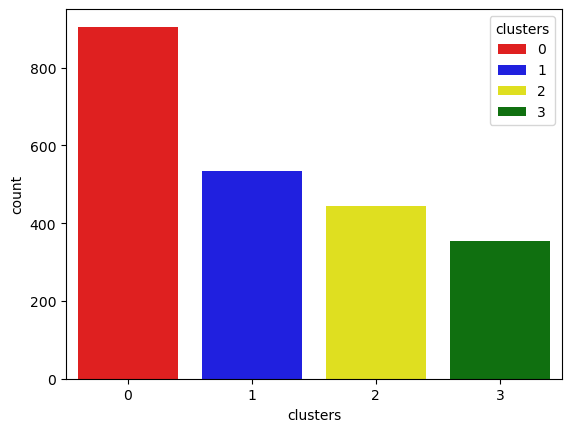

In [71]:
pal = ["red", "blue","yellow","green"]

sns.countplot(x = X["clusters"], palette = pal, hue = X["clusters"])

<Axes: xlabel='Total_spending', ylabel='Income'>

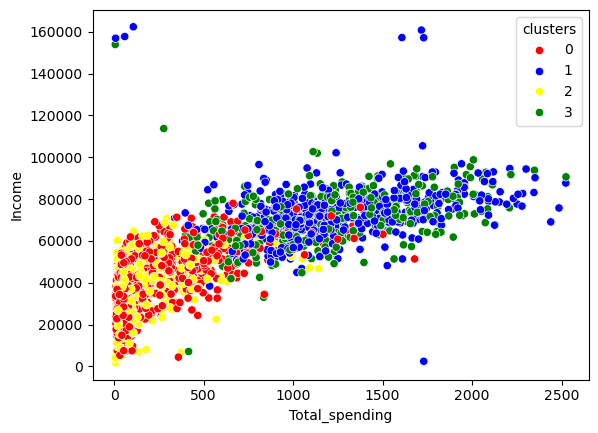

In [72]:
# Income and spending patterns

sns.scatterplot(x = X["Total_spending"], y=X["Income"], hue = X["clusters"], palette = pal)

# cluster Summary

In [76]:
cluster_summary = X.groupby("clusters").mean()
print(cluster_summary)

                Income    Recency  NumDealsPurchases  NumWebPurchases  \
clusters                                                                
0         39680.580110  48.914917           2.594475         3.153591   
1         72808.445693  49.202247           1.958801         5.687266   
2         36960.143018  48.319820           2.594595         2.713964   
3         70722.681303  50.504249           1.855524         5.790368   

          NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
clusters                                                                        
0                    0.969061           4.143646           6.307182  0.011050   
1                    5.498127           8.659176           3.580524  0.005618   
2                    0.837838           3.623874           6.659910  0.011261   
3                    5.014164           8.430595           3.728045  0.005666   

          Response        Age  Customer_Tenure_Days  Total_spending  \
clu